In [ ]:
##ARIMAX MODELLING FOR USAGE VARIABLE##

In [2]:
#importing lib 

import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
import numpy as np
import statsmodels.tsa.stattools as ts
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm 




C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#loading file
dataset = read_csv('F:/2018/cdac_project/19-072018/outlier_removed1.csv',index_col='Date_Time',parse_dates=True)

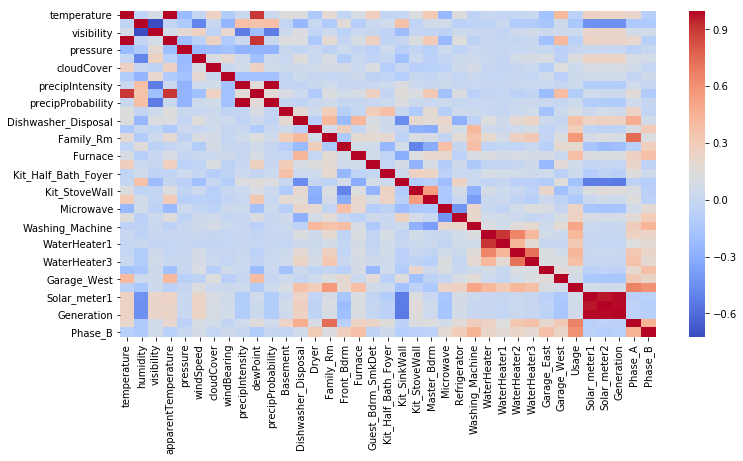

In [4]:
# spearman correlation heatmap
# Determines how variable are correated to each other
pyplot.figure(figsize=(12,6))
sns.heatmap(dataset.corr(method='spearman'),cmap='coolwarm')

In [5]:
#Correation Table
dataset.corr(method='spearman')

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,...,WaterHeater2,WaterHeater3,Garage_East,Garage_West,Usage,Solar_meter1,Solar_meter2,Generation,Phase_A,Phase_B
temperature,1.000000,-0.036349,0.081082,0.996895,-0.221526,-0.007759,0.260715,-0.101855,0.022705,0.901334,...,-0.005609,0.020935,-0.183889,0.413883,-0.057608,0.260125,0.243480,0.245405,0.215499,-0.077213
humidity,-0.036349,1.000000,-0.723316,-0.011728,-0.117772,-0.490533,0.006087,-0.256810,0.386563,0.360919,...,-0.107786,-0.108032,-0.153462,0.036337,-0.140394,-0.432067,-0.441746,-0.440904,-0.118087,-0.123586
visibility,0.081082,-0.723316,1.000000,0.068017,0.190931,0.263719,-0.039314,0.202507,-0.530043,-0.197901,...,0.048595,0.058815,0.033961,0.049462,0.042738,0.220828,0.224752,0.224188,0.063168,0.063787
apparentTemperature,0.996895,-0.011728,0.068017,1.000000,-0.204532,-0.060124,0.253734,-0.115562,0.021030,0.906454,...,-0.007156,0.017690,-0.186053,0.415630,-0.058617,0.251397,0.234290,0.236440,0.210691,-0.075724
pressure,-0.221526,-0.117772,0.190931,-0.204532,1.000000,-0.228737,-0.217751,-0.181706,-0.270233,-0.259575,...,0.013958,0.021190,0.005424,-0.069818,0.001482,0.021247,0.011420,0.016999,-0.061993,0.009022
windSpeed,-0.007759,-0.490533,0.263719,-0.060124,-0.228737,1.000000,0.098935,0.191091,0.044387,-0.185037,...,0.074662,0.088384,0.113390,-0.044532,0.118292,0.236503,0.247448,0.244864,0.095469,0.073671
cloudCover,0.260715,0.006087,-0.039314,0.253734,-0.217751,0.098935,1.000000,0.021244,0.070214,0.255650,...,0.004553,0.024875,-0.077683,0.138019,0.042334,0.110334,0.095528,0.099351,0.067761,-0.008144
windBearing,-0.101855,-0.256810,0.202507,-0.115562,-0.181706,0.191091,0.021244,1.000000,-0.183479,-0.188784,...,-0.000486,-0.003229,0.052328,-0.065128,0.034489,0.063455,0.063358,0.064513,-0.010326,0.046330
precipIntensity,0.022705,0.386563,-0.530043,0.021030,-0.270233,0.044387,0.070214,-0.183479,1.000000,0.169502,...,0.017550,0.028547,0.021851,-0.000834,0.039608,-0.107310,-0.102393,-0.105046,0.053701,-0.001001
dewPoint,0.901334,0.360919,-0.197901,0.906454,-0.259575,-0.185037,0.255650,-0.188784,0.169502,1.000000,...,-0.054152,-0.027021,-0.221116,0.398504,-0.101978,0.054223,0.035137,0.036842,0.159390,-0.109207


In [ ]:
# implementing autocorrelation_plot to select the value of p in ARIMA(p=lag  in autoregression)
Usage_df=dataset['2014-01-01':'2017-01-01'].Usage

#dff2
autocorrelation_plot(Usage_df)

In [ ]:
#auto-correation Function
acf=acf(Usage_df)
